## Create Detailed Fund Analysis Using pyfolio

Yan Wu<br/>
yanwu26@gmail.com <br/>
October 2016

#### Description:

Quantopian developed a set of open source tools to improve investment analysis process. The key package demonstrated in this workbook is pyfolio, an integrated python package that creates detailed performance analytics based on the return stream of a portfolio and benchmark.

For this scenario, we've chosen the FMI International Fund (FMIJX) as the fund and MSCI ACWI ex US as the benchmark (ACWX)

All data, tools, and code are publicly available. No guarantee of data accuracy.


In [51]:
%matplotlib inline
import pyfolio as pf
import gzip
import os
import pandas as pd
from pandas_datareader import data as wb

#### Helper function to get data

In [52]:
def get_historical_closes(ticker, start_date, end_date):
    # get the data for the tickers.  This will be a panel
    p = wb.DataReader(ticker, "yahoo", start_date, end_date)    
    # convert the panel to a DataFrame and selection only Adj Close
    # while making all index levels columns
    d = p.to_frame()['Adj Close'].reset_index()
    # rename the columns
    d.rename(columns={'minor': 'Ticker', 'Adj Close': 'Close'}, inplace=True)
    # pivot each ticker to a column
    pivoted = d.pivot(index='Date', columns='Ticker')
    # and drop the one level on the columns
    pivoted.columns = pivoted.columns.droplevel(0)
    pivoted.index = pivoted.index.tz_localize("UTC")
    return pivoted

ticker_ls=['FMIJX','ACWX']
start_dt = '2010-12-31'
end_dt = '2016-06-30'
df_data=get_historical_closes(ticker_ls,start_dt,end_dt)
df_data=df_data.pct_change().dropna()

#### Returns set to fund, Benchmark set to ACWX US ETF

In [43]:
ret=df_data.FMIJX
bm=df_data.ACWX

#### Create Full Set of Investment Analysis Using Pyfolio 

Entire data start date: 2011-01-03
Entire data end date: 2016-06-30


Backtest Months: 65


Performance statistics,Backtest
cum_returns_final,0.61
annual_return,0.09
annual_volatility,0.12
sharpe_ratio,0.77
calmar_ratio,0.56
stability_of_timeseries,0.90
max_drawdown,-0.16
omega_ratio,1.14
sortino_ratio,1.09
skew,-0.41


Worst Drawdown Periods,net drawdown in %,peak date,valley date,recovery date,duration
0,16.37,2011-05-10,2011-08-19,2012-02-21,206
1,13.08,2015-05-27,2016-02-11,NaT,NaN
2,7.87,2014-09-05,2014-10-16,2015-01-22,100
3,7.76,2012-05-01,2012-06-01,2012-07-27,64
4,7.35,2011-02-18,2011-03-16,2011-04-13,39




[-0.015 -0.031]


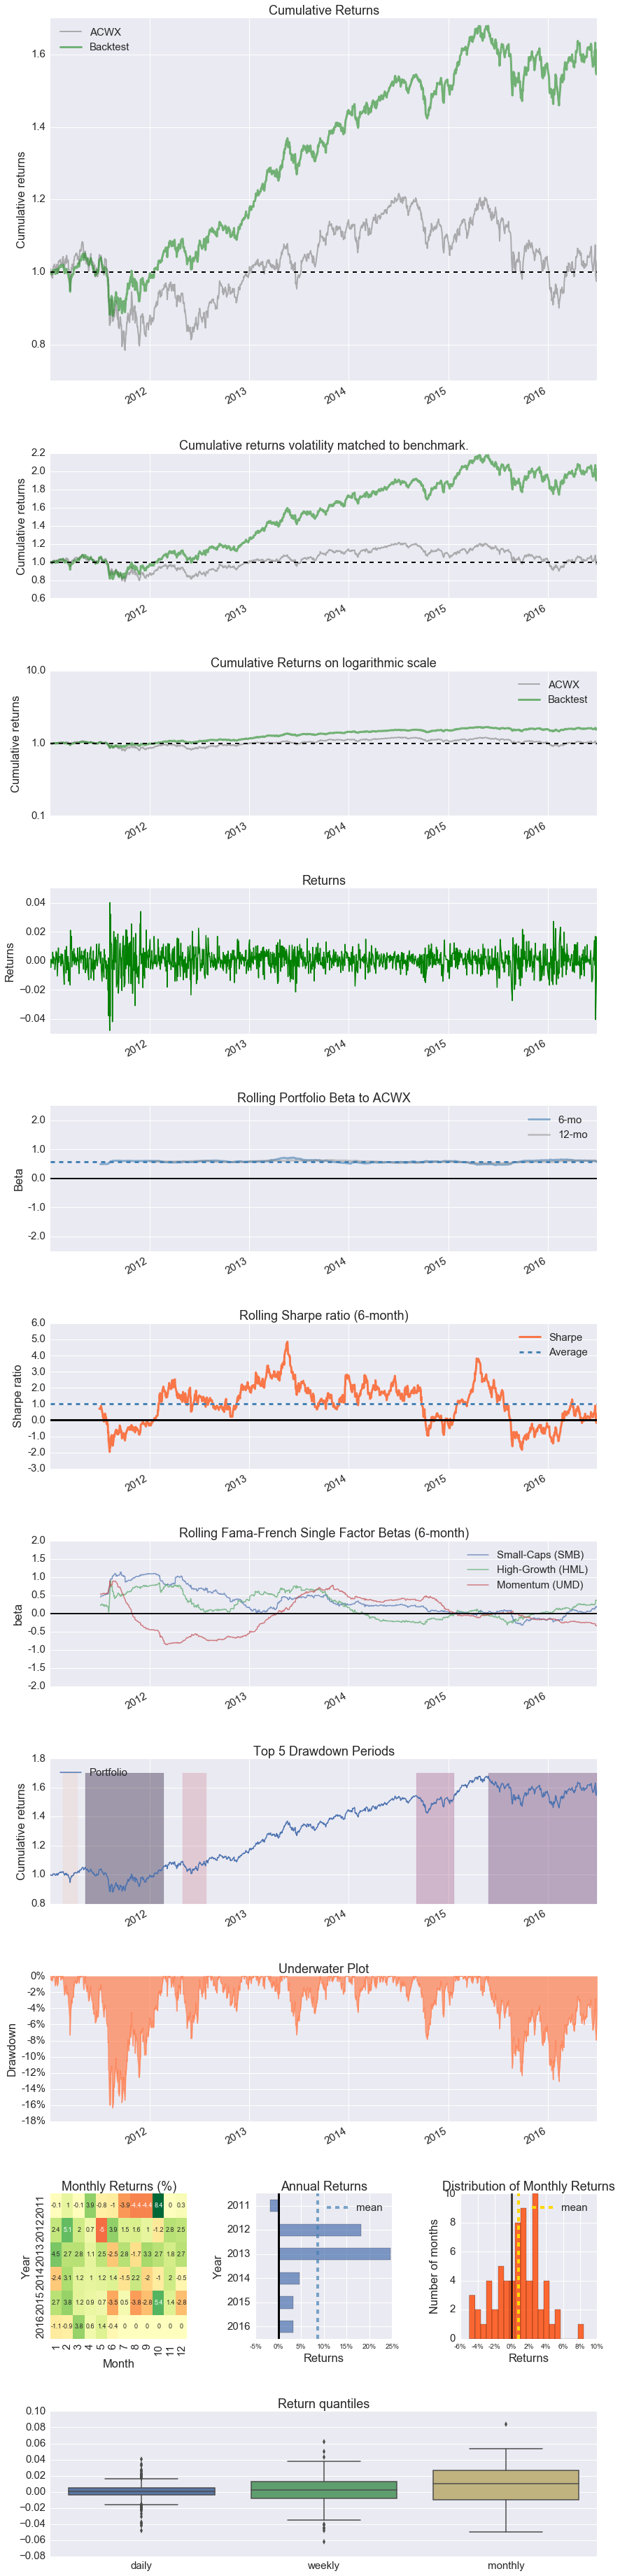

Stress Events,mean,min,max
US downgrade/European Debt Crisis,0.00%,-4.80%,4.02%
Fukushima,0.28%,-1.66%,2.12%
EZB IR Event,-0.05%,-0.85%,1.03%
Apr14,0.04%,-0.86%,0.87%
Oct14,-0.04%,-1.50%,1.18%
Fall2015,-0.19%,-2.74%,2.18%
Recovery,0.03%,-4.80%,4.02%
New Normal,0.04%,-4.04%,2.73%


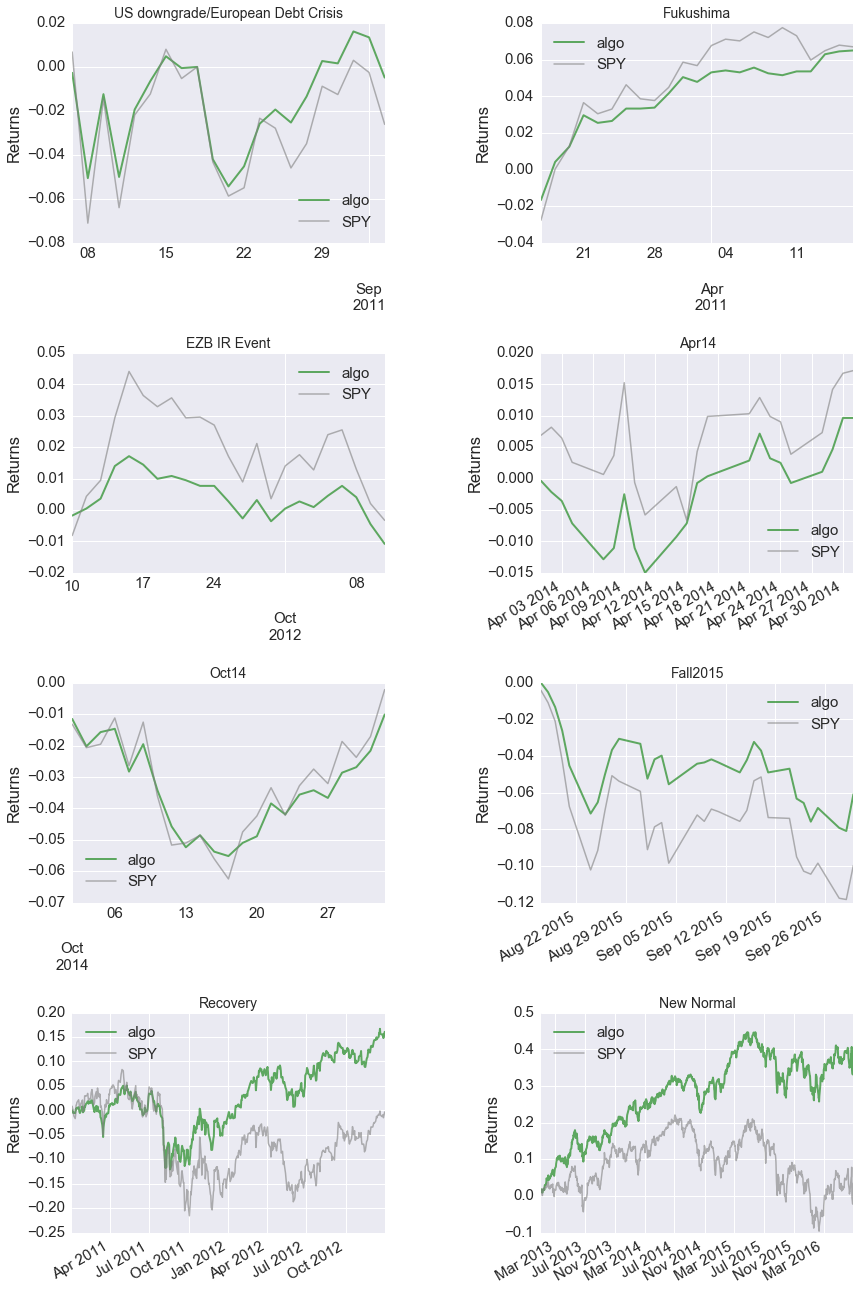

In [44]:
pf.create_full_tear_sheet(ret, benchmark_rets=bm)